IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


C:\Users\chiar\AppData\Local\Temp\ipykernel_35068\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\Local\Temp\ipykernel_35068\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\Local\Temp\ipykernel_35068\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\Local\Temp\ipykernel_35068\1447394833.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_1 = df_1.append(df,ignore_index=True)
C:\Users\chiar\AppData\L

In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.025278   0.017191   -0.117391   0.133346         79.0   
1       1.0 -0.025284   0.017142   -0.109234   0.133164        107.0   
2       2.0 -0.025410   0.017099   -0.104507   0.133027        110.0   
3       3.0 -0.026125   0.017232   -0.127146   0.133661         78.0   
4       4.0 -0.026810   0.017350   -0.150134   0.134237         81.0   
...     ...       ...        ...         ...        ...          ...   
1327   61.0 -0.033834   0.004468   -0.091229   0.074844          0.0   
1328   62.0 -0.033994   0.004467   -0.098090   0.074915          0.0   
1329   63.0 -0.034181   0.004471   -0.108344   0.075024          0.0   
1330   64.0 -0.034515   0.004507   -0.121542   0.075413          0.0   
1331   65.0 -0.034765   0.004522   -0.137664   0.075629          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            76.0    3.609819    3.564965 -0.021368  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      68.0 -0.019135   0.017611    2.884902   0.133923          0.0   
1      69.0 -0.034783   0.022035   -0.010314   0.152290        130.0   
2      31.0  0.012372   0.007559   -0.322638   0.087705         72.0   
3      40.0 -0.022698   0.009518    2.592758   0.100044         99.0   
4      66.0 -0.030105   0.009866    2.134628   0.103674        104.0   
...     ...       ...        ...         ...        ...          ...   
1327   65.0 -0.033623   0.022053    0.010846   0.152087        131.0   
1328   63.0 -0.064000   0.011856    0.503482   0.126189          0.0   
1329   48.0 -0.057025   0.027097   -1.014898   0.174014          0.0   
1330   22.0 -0.030503   0.017662    3.668552   0.136179         80.0   
1331   17.0 -0.040288   0.020329   -0.908161   0.147976         75.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            88.0   14.686612    9.426301 -0.011444  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.019135   0.017611    2.884902   0.133923          0.0         88.0   
1    -0.034783   0.022035   -0.010314   0.152290        130.0        131.0   
2     0.012372   0.007559   -0.322638   0.087705         72.0         74.0   
3    -0.022698   0.009518    2.592758   0.100044         99.0         78.0   
4    -0.030105   0.009866    2.134628   0.103674        104.0        107.0   
...        ...        ...         ...        ...          ...          ...   
1327 -0.033623   0.022053    0.010846   0.152087        131.0        130.0   
1328 -0.064000   0.011856    0.503482   0.126189          0.0        101.0   
1329 -0.057025   0.027097   -1.014898   0.174014          0.0         84.0   
1330 -0.030503   0.017662    3.668552   0.136179         80.0          0.0   
1331 -0.040288   0.020329   -0.908161   0.147976         75.0         74.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
index_list = [470]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
470 -0.141198   0.033672   -0.776243   0.231344        112.0          0.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
470    9.767488    6.167577  0.011852   0.004216  ...       8548.159498   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
470         3.362593          0.509861            0.12162          3.437374   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
470                96.0                97.0           8.464661   

     amp2(Curr(ESC_5))  Guasto  
470           2.830968       0  

[1 rows x 169 columns]


In [8]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[470]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.019135   0.017611    2.884902   0.133923          0.0         88.0   
1    -0.034783   0.022035   -0.010314   0.152290        130.0        131.0   
2     0.012372   0.007559   -0.322638   0.087705         72.0         74.0   
3    -0.022698   0.009518    2.592758   0.100044         99.0         78.0   
4    -0.030105   0.009866    2.134628   0.103674        104.0        107.0   
...        ...        ...         ...        ...          ...          ...   
1327 -0.033623   0.022053    0.010846   0.152087        131.0        130.0   
1328 -0.064000   0.011856    0.503482   0.126189          0.0        101.0   
1329 -0.057025   0.027097   -1.014898   0.174014          0.0         84.0   
1330 -0.030503   0.017662    3.668552   0.136179         80.0          0.0   
1331 -0.040288   0.020329   -0.908161   0.147976         75.0         74.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [9]:
# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

In [10]:
guasto_10 = df_1[df_1['Guasto'] == 2]
no_guasto = df_1[df_1['Guasto'] == 0]
guasto_5 = df_1[df_1['Guasto'] == 1]

print("No guasto: ", len(no_guasto), "Guasto 5%: ", len(guasto_5), "Guasto 10%: ", len(guasto_10))

No guasto:  386 Guasto 5%:  412 Guasto 10%:  533


### Bilanciamento del dataset

In [11]:
#bilanciamento del dataset con undersampling rispetto al no_guasto
balanced_d = pd.concat([no_guasto, guasto_10.sample(len(no_guasto)), guasto_5.sample(len(no_guasto))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(1158, 169)

In [ ]:
#x = df_1.iloc[:,:-1]
#y = df_1.iloc[:,-1:]

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
sel_mutual = SelectKBest(mutual_info_classif, k=15)
X_train_mutual = sel_mutual.fit_transform(x, y)
print(sel_mutual.get_support())

i=0
index_false=[]
for el in list(sel_mutual.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True  True  True False False False False False False False False
 False False False False False False False  True False False False False
  True False False  True False False False False False  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False  True False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False Fa

In [13]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      var(GyrX)  kurt(GyrX)  RMS(GyrX)  RMS(GyrZ)  <>(AccX)  RMS(AccX)  \
8      0.011932    0.482767   0.126429   0.123408 -0.270199   0.351119   
11     0.012132    0.432150   0.127079   0.124141 -0.270424   0.352375   
15     0.010449    0.294217   0.112562   0.130170 -0.075165   0.267474   
16     0.004443   -0.071820   0.074039   0.236983  0.110262   0.341521   
17     0.004330   -0.011782   0.073033   0.229628  0.120421   0.341509   
...         ...         ...        ...        ...       ...        ...   
254    0.012055    2.264978   0.109917   0.109502  0.101417   0.309806   
89     0.007517   -0.309396   0.087201   0.164239  0.019732   0.195973   
394    0.009847    2.077565   0.104251   0.110254 -0.060475   0.190404   
1117   0.040373   -1.522782   0.242802   0.153558  0.098082   0.222398   
137    0.007611   -0.339798   0.088053   0.166513  0.016737   0.195977   

      var(AccY)  kurt(AccY)  RMS(AccY)  <>(Pitch)  var(Curr(ESC_0))  \
8      0.118697   -0.410419   0.456503  

### Separazione del dataset in training e test

In [14]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(926, 15)
(232, 15)
(926, 1)
(232, 1)


In [ ]:
#from sklearn.feature_selection import SelectKBest, mutual_info_classif
#sel_mutual = SelectKBest(mutual_info_classif, k=6)
#X_train_mutual = sel_mutual.fit_transform(x_train, y_train)
#print(sel_mutual.get_support())

#i=0
#index_false=[]
#for el in list(sel_mutual.get_support()):
#    if not el:
#        index_false.append(i)
#    i=i+1
#print(index_false)

In [ ]:
#x_train=x_train.drop(x_train.columns[index_false],axis = 1)
#x_test=x_test.drop(x_test.columns[index_false],axis = 1)

In [ ]:
x_train

In [15]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    #DecisionTreeClassifier(random_state=rs, max_depth=5),
    #RandomForestClassifier(n_estimators = 100, random_state=rs),
    #GradientBoostingClassifier(random_state= rs, n_estimators=100),
    AdaBoostClassifier(n_estimators=100, random_state= rs),
    LinearDiscriminantAnalysis(),
    SVC(probability=True),
    GaussianNB(),
    #KNeighborsClassifier(n_neighbors=10)
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [16]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 0.76 	 ---> LogisticRegression 
Accuracy: 0.97 	 ---> AdaBoostClassifier 
Accuracy: 1.0 	 ---> LinearDiscriminantAnalysis 
Accuracy: 0.76 	 ---> SVC 
Accuracy: 0.75 	 ---> GaussianNB 


### Matrici di confusione

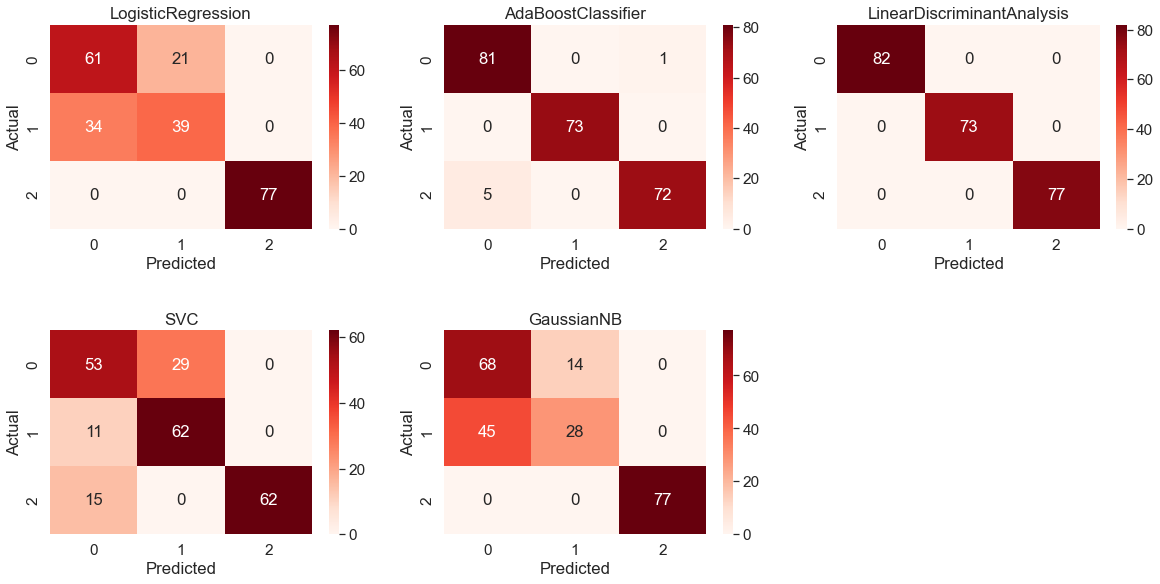

In [17]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [18]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.74      0.69        82
           1       0.65      0.53      0.59        73
           2       1.00      1.00      1.00        77

    accuracy                           0.76       232
   macro avg       0.76      0.76      0.76       232
weighted avg       0.76      0.76      0.76       232

AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        82
           1       1.00      1.00      1.00        73
           2       0.99      0.94      0.96        77

    accuracy                           0.97       232
   macro avg       0.98      0.97      0.97       232
weighted avg       0.97      0.97      0.97       232

LinearDiscriminantAnalysis Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      

In [19]:
#clf = SVC(probability=True).fit(x_train, y_train)
clf = GaussianNB().fit(x_train, y_train)
scores = cross_val_score(clf, x_test, y_test, cv=5)
print(scores)

[0.76595745 0.68085106 0.65217391 0.73913043 0.84782609]


C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chiar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was pass

TESTING DEL MODELLO

In [20]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [21]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     var(GyrX)  kurt(GyrX)  RMS(GyrX)  RMS(GyrZ)  <>(AccX)  RMS(AccX)  \
470   0.033672   -0.776243   0.231344   0.168726 -0.353062   0.409079   

     var(AccY)  kurt(AccY)  RMS(AccY)  <>(Pitch)  var(Curr(ESC_0))  \
470   0.213584   -0.470523   0.611077  -0.168175          0.482564   

     <>(RPM(ESC_1))  var(Curr(ESC_1))  var(RPM(ESC_2))  var(RPM(ESC_5))  
470     4776.378307          0.189567     504350.25874    777984.592431  


In [22]:
guasto_pred = pd.Series(clf.predict(df_test), name='Guasto_test')
guasto_pred.value_counts()

0    1
Name: Guasto_test, dtype: int64